
# **Import Library**



In [42]:
!pip install -U scikit-learn


In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import LabelEncoder

# !pip install joblib
import joblib

import warnings
warnings.filterwarnings('ignore')

In [45]:
!pip install pycaret


  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [9]:
!pip install autoviz -q

In [1]:
# import pycaret
from pycaret.regression import *

In [4]:
# import datasets
df = pd.read_csv("/content/drive/MyDrive/Datasets/tehranhouses.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [5]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3155,80,2,True,True,True,East Ferdows Boulevard,2980000000,99333.33
508,110,2,True,True,False,Pardis,1870000000,62333.33
2415,72,2,True,True,True,Punak,3200000000,106666.67
1726,190,3,True,True,True,Farmanieh,25000000000,833333.33
1780,182,3,True,True,True,Saadat Abad,11500000000,383333.33


In [6]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [7]:
df = df.drop("Price(USD)", axis=1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


In [8]:
setup(df, target='Price', session_id=22, remove_outliers=True)


,Description,Value
0,Session id,22
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1684092107.9300,28392084221977681920.0000,5150110181.2480,0.5768,0.5038,0.4461,1.4790
lightgbm,Light Gradient Boosting Machine,1758662975.8604,29214242349249105920.0000,5230118660.4161,0.5619,0.4993,0.4624,0.9680
et,Extra Trees Regressor,1794959416.6418,29224454467720765440.0000,5236260159.4134,0.5616,0.5225,0.4732,0.9020
rf,Random Forest Regressor,1758853325.4771,29331777434997415936.0000,5247736204.7036,0.5606,0.4950,0.4475,0.7180
gbr,Gradient Boosting Regressor,1837451614.9257,29193960926778347520.0000,5245407847.7651,0.5591,0.5166,0.5125,0.3990
dt,Decision Tree Regressor,1962455509.8842,31652525696023994368.0000,5522498714.8489,0.5152,0.5930,0.5019,0.2640
ridge,Ridge Regression,2569895216.3215,33108488717177741312.0000,5617388247.6734,0.5012,0.9783,1.0462,0.8330
llar,Lasso Least Angle Regression,2569818639.0134,33105951953776025600.0000,5617183296.5708,0.5012,0.9797,1.0461,0.4760
lar,Least Angle Regression,2569818638.8841,33105951952006148096.0000,5617183296.4256,0.5012,0.9797,1.0461,0.3910
lasso,Lasso Regression,2569818639.0134,33105951953776013312.0000,5617183296.5708,0.5012,0.9797,1.0461,0.4790


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=22,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1500019846.6230,17637976706603794432.0000,4199759124.8313,0.7001,0.5352,0.5174
1,1849305681.3443,33648544921992347648.0000,5800736584.4341,0.5508,0.4030,0.3247
2,1188774136.4262,7052507618348987392.0000,2655655779.3413,0.8109,0.5021,0.3654
3,1927070662.2951,48138889963715461120.0000,6938219509.6232,0.4647,0.4492,0.3167
4,1689186966.2951,15744914935588743168.0000,3967986256.9808,0.7243,0.4838,0.4464
5,1647066621.2346,31770704105711702016.0000,5636550727.6802,0.5316,0.5244,0.4743
6,2146706245.0494,44223105402824843264.0000,6650045518.8536,0.4813,0.5108,0.4148
7,1553268118.0576,13250824650257741824.0000,3640168217.3023,0.7356,0.5480,0.4957
8,1606213977.4815,40952306122994376704.0000,6399398887.6296,0.3615,0.5220,0.4576


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB


In [12]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


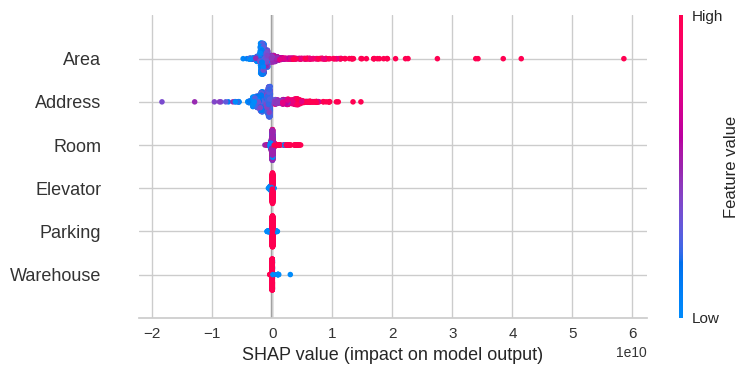

In [ ]:
interpret_model(xgboost)

In [13]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


In [15]:
df.describe()

,Area,Room,Price
count,3.479000e+03,3479.000000,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09
std,3.167266e+08,0.758275,8.099935e+09
min,3.000000e+01,0.000000,3.600000e+06
25%,6.900000e+01,2.000000,1.418250e+09
50%,9.000000e+01,2.000000,2.900000e+09
75%,1.200000e+02,2.000000,6.000000e+09
max,1.616000e+10,5.000000,9.240000e+10


In [16]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [17]:
df.shape

(3479, 7)

In [18]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0


In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(3456, 7)

In [21]:
df['Parking'].value_counts(normalize=True) * 100

,proportion
Parking,
True,84.751157
False,15.248843


In [22]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [23]:
below_85  = df[df.Area <= 85]
len(below_85)

1522

# Expand

In [ ]:
df[df.Area <= 85]['Parking'].value_counts()

,count
Parking,
True,1104
False,418


In [ ]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [24]:
len(df.Address.unique())

192

In [ ]:
round(df.Price.mean())

5379956887

In [25]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [ ]:
df.groupby('Room')['Price'].mean()

,Price
Room,
0,7860500000
1,1707480867
2,3330303037
3,10938692886
4,25600328571
5,33734393939


In [ ]:
room_parking_room_mean_df = df.groupby(['Room', 'Parking'])['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [27]:
df2 = df.copy()

In [ ]:
df2.loc[:, 'Price'] = df['Price'].map('{:,.0f}'.format)

In [28]:
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


In [29]:
df.dtypes

,0
Area,int64
Room,int64
Parking,bool
Warehouse,bool
Elevator,bool
Address,object
Price,int64


<Figure size 800x500 with 0 Axes>

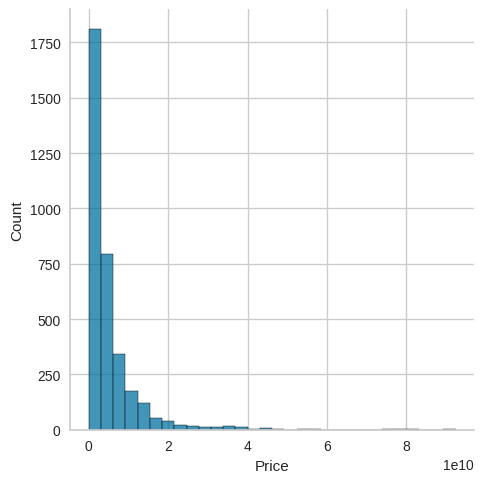

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'], bins=30,)

<Axes: >

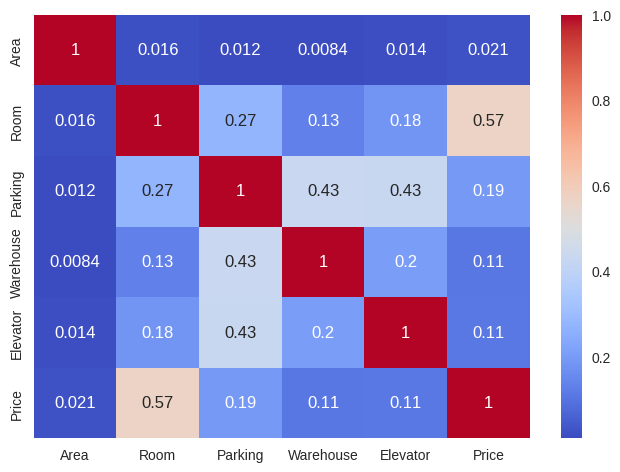

In [ ]:
# df = df.drop('Address', axis=1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

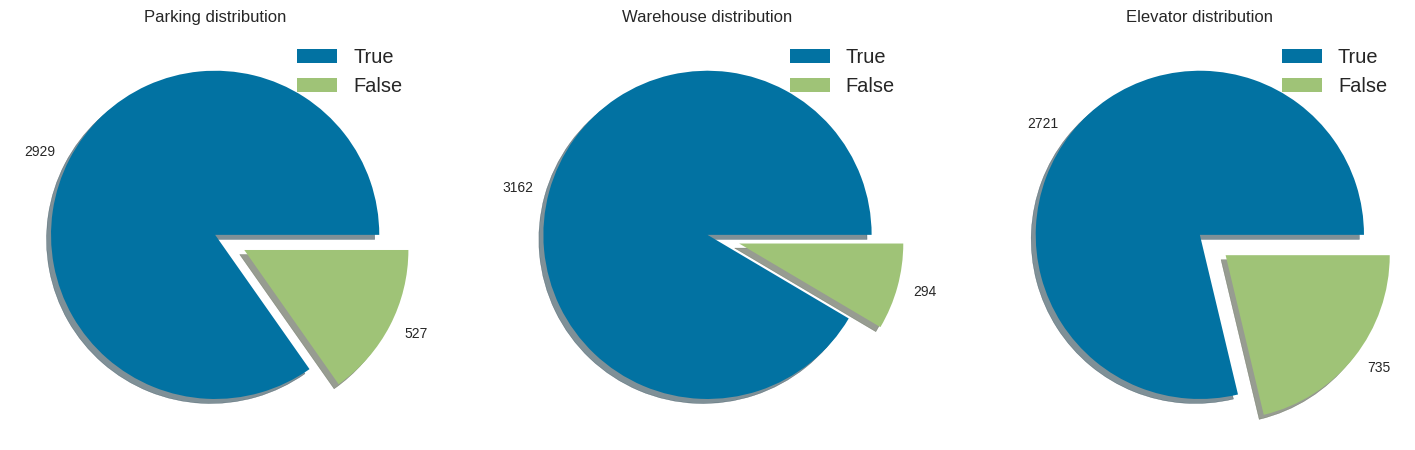

In [ ]:
fig ,ax = plt.subplots(ncols=3, figsize=(18,6))

myexplode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i in range(3):
  data = df[columns[i]].value_counts()
  ax[i].pie(data, labels=data.values, explode=myexplode, shadow = True)
  ax[i].legend(labels=data.index, fontsize='large')
  ax[i].set_title('{} distribution'.format(columns[i]))


In [30]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

# Preprocessing Data

In [31]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0


In [32]:
boolean_features = ['Area','Parking', 'Warehouse', 'Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3456 non-null   int64 
 1   Room       3456 non-null   int64 
 2   Parking    3456 non-null   int64 
 3   Warehouse  3456 non-null   int64 
 4   Elevator   3456 non-null   int64 
 5   Address    3456 non-null   object
 6   Price      3456 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 216.0+ KB


<Axes: xlabel='Price'>

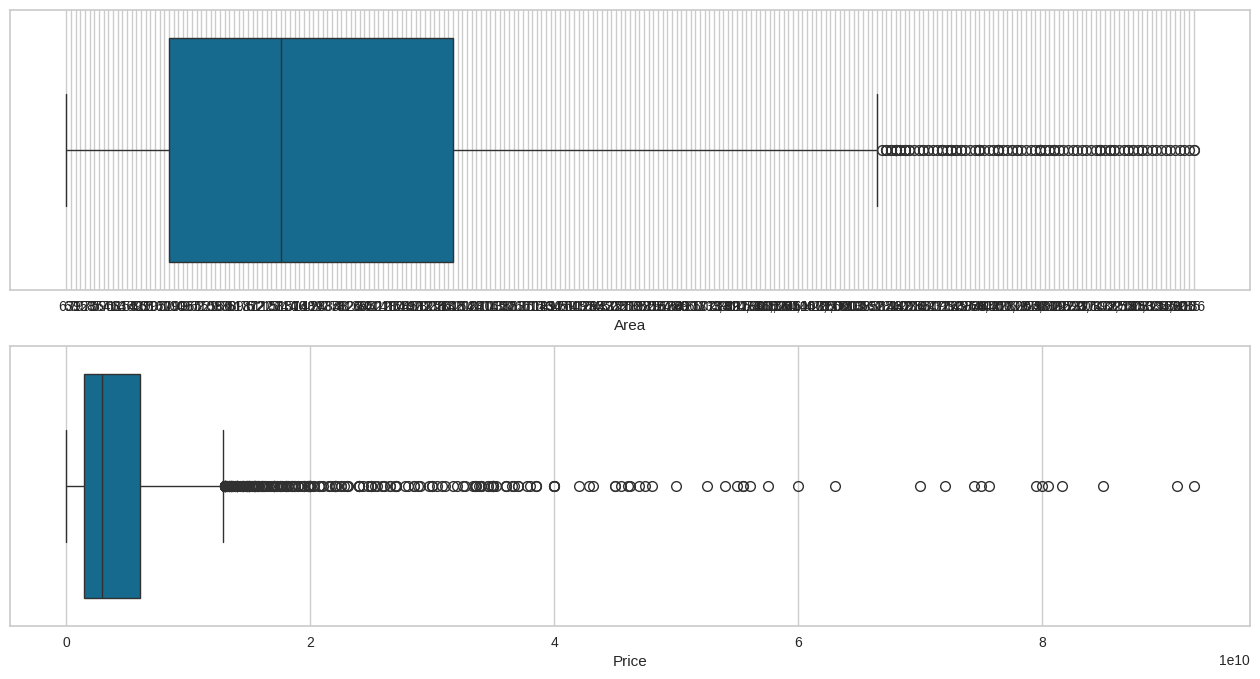

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x= df['Price'])

In [33]:
def lower_upper(x):
  Q1 = np.percentile(x, 25)
  Q3 = np.percentile(x, 75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")


Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [34]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)

total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of totlal outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of totlal outliers: 366


In [35]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [36]:
# df.columns
address_dummy = pd.get_dummies(df['Address'], dtype=float)
df_final = df.merge(address_dummy, left_index= True, right_index= True)
# df_final = df.drop(columns = 'Address', inplace= True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,Shahran,1850000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,Shahran,1850000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,Pardis,550000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Initialize the Label Encoder
le = LabelEncoder()
cols = df_final[['Parking', 'Warehouse', 'Elevator']]
# Apply label encoding to each column
for column in cols:
    df_final[column] = le.fit_transform(df_final[column])
df_final.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,Shahran,1850000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,Shahran,1850000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,Pardis,550000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,Shahrake Qods,902500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,Shahrake Gharb,7000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = df_final.drop(columns=['Price','Address'])
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Area,Room,Parking,Warehouse,Elevator,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
619,84,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,53,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,90,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3012,71,2,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29,100,2,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
def hyperparameters(model, parameters):

  start = time.time()

  grid = GridSearchCV(model,
                      param_grid=parameters,
                      refit=True,
                      cv=KFold(shuffle=True, random_state=1),
                      n_jobs= -1
                      )
  grid_fit = grid.fit(X_train, y_train)
  y_train_pred = grid_fit.predict(X_train)
  y_pred = grid_fit.predict(X_test)

  train_score = grid_fit.score(X_train, y_train)
  test_score = grid_fit.score(X_test, y_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

  model_name = str(model).split('(')[0]

  end = time.time()

  print(f"The Best Parameters for {model_name} model is: {grid_fit.best_params_}")
  print("--" * 10)
  print(f"R2 Score in the training set is {train_score:0.2%} for {model_name} model.")
  print(f"R2 Score in the testing set is {test_score:0.2%} for {model_name} model.")
  print(f" RMSE  is {RMSE:,} for {model_name} model.")
  print("--" * 10)
  print(f"Runtime of the program is : {end - start:0.2f}")

  return train_score, test_score, RMSE

In [39]:
lr = LinearRegression(n_jobs= -1)
lr_train_score, lr_test_score, lr_RMSE = hyperparameters(lr, {})

The Best Parameters for LinearRegression model is: {}
--------------------
R2 Score in the training set is 60.40% for LinearRegression model.
R2 Score in the testing set is 53.35% for LinearRegression model.
 RMSE  is 6,357,973,671.712957 for LinearRegression model.
--------------------
Runtime of the program is : 2.98


In [40]:
ridge = Ridge(random_state = 1)
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
ridge_train_score, ridge_test_score, ridge_RMSE = hyperparameters(ridge, param_ridge)

The Best Parameters for Ridge model is: {'alpha': 0.001}
--------------------
R2 Score in the training set is 60.40% for Ridge model.
R2 Score in the testing set is 53.36% for Ridge model.
 RMSE  is 6,357,553,945.624987 for Ridge model.
--------------------
Runtime of the program is : 0.84


In [41]:
lasso = Lasso(random_state = 1)
param_lasso =  {'alpha':[0.001, 0.01, 0.1, 1, 10]}
lasso_train_score, lasso_test_score, lasso_RMSE = hyperparameters(lasso, param_lasso)

The Best Parameters for Lasso model is: {'alpha': 0.001}
--------------------
R2 Score in the training set is 60.40% for Lasso model.
R2 Score in the testing set is 53.35% for Lasso model.
 RMSE  is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is : 16.94


In [42]:
eln = ElasticNet(random_state = 1)
param_eln = {
              'alpha':  [0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]
            }
eln_train_score, eln_test_score, eln_RMSE = hyperparameters(eln, param_eln)

The Best Parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
R2 Score in the training set is 59.51% for ElasticNet model.
R2 Score in the testing set is 55.36% for ElasticNet model.
 RMSE  is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is : 39.36


In [43]:
drt = DecisionTreeRegressor(random_state= 1 )
drt_param = {
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,]
}
drt_train_score, drt_test_score, drt_RMSE = hyperparameters(drt, drt_param)

The Best Parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
R2 Score in the training set is 97.91% for DecisionTreeRegressor model.
R2 Score in the testing set is 71.37% for DecisionTreeRegressor model.
 RMSE  is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is : 2.29


In [44]:
rf = RandomForestRegressor(random_state= 1 , n_jobs = -1)
rf_params = {
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,]
}
rf_train_score, rf_test_score, rf_RMSE = hyperparameters(rf, rf_params)

The Best Parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
R2 Score in the training set is 94.05% for RandomForestRegressor model.
R2 Score in the testing set is 77.55% for RandomForestRegressor model.
 RMSE  is 4,411,228,714.032563 for RandomForestRegressor model.
--------------------
Runtime of the program is : 101.62


In [45]:
knr  = KNeighborsRegressor(n_jobs = -1)
knr_params = {
    'n_neighbors': [5,10,15,20],
    'weights': ['uniform', 'distance']
}
knr_train_score, knr_test_score, knr_RMSE = hyperparameters(knr, knr_params)

The Best Parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
R2 Score in the training set is 60.34% for KNeighborsRegressor model.
R2 Score in the testing set is 65.38% for KNeighborsRegressor model.
 RMSE  is 5,477,496,833.022048 for KNeighborsRegressor model.
--------------------
Runtime of the program is : 2.69


# XGBoost

In [48]:
!pip install xgboost

In [50]:
import xgboost as xgb

In [ ]:
xgboost  = xgb.XGBRegressor(n_jobs = -1)
xgb_params = {
    'n_estimators': [100,300,500,1000],
    'learning_rate': [0.2, 0.1, 0.05],
    'subsample': [0.75],
    'colsample_bytree': [1],
    'max_depth': [3, 4, 5, 6],
    'gamma': [0]
}
xgboost_train_score, xgboost_test_score, xgboost_RMSE = hyperparameters(xgboost, xgb_params)